# Demonstration of usage of word embeddings (derived from keras one-hot, glove and gensim) in keras models

In [4]:
from gensim.models import Word2Vec

In [6]:
sentence = ['this is the first sentence for word2vec','this is the second sentence','yet another sentence','one more sentence', 
            'and the final sentence']

In [8]:
# Define the training data
tokens = [i.split() for i in sentence]
print(tokens)

[['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], ['this', 'is', 'the', 'second', 'sentence'], ['yet', 'another', 'sentence'], ['one', 'more', 'sentence'], ['and', 'the', 'final', 'sentence']]


In [10]:
# reducing the lists of lists into a flat list
from functools import reduce
flat_list = reduce(lambda x,y: x+y,tokens)
print(flat_list)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'this', 'is', 'the', 'second', 'sentence', 'yet', 'another', 'sentence', 'one', 'more', 'sentence', 'and', 'the', 'final', 'sentence']


In [11]:
# train the model
# duplicate words will be taken care automatically
# by default, every single word will be represented by a 100 dimensional vector in the embedded space
model = Word2Vec(tokens, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
#model.save('model.bin')
# load model
#new_model = Word2Vec.load('model.bin')
#print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['and', 'word2vec', 'for', 'sentence', 'this', 'is', 'one', 'second', 'another', 'the', 'first', 'yet', 'final', 'more']
[  1.09108200e-03  -1.50774524e-03  -3.20697599e-03  -9.94841801e-04
   3.15078214e-04   4.37214086e-03  -3.69665888e-03  -3.33983405e-03
  -4.54258965e-03   9.99633805e-04  -4.23612585e-03  -3.83223081e-03
   4.32860339e-03  -3.25149111e-03   2.95695267e-03  -3.71881900e-03
  -1.00519822e-03   4.84643737e-03  -3.53238801e-03   1.22420708e-04
  -4.58742678e-03   3.71732470e-03  -4.15829709e-03  -3.93305486e-03
  -8.70488118e-04  -4.59041959e-03   3.76840495e-03  -3.98694444e-03
   1.56842021e-03   4.36723279e-03   1.75691827e-03   1.42543553e-03
  -3.02267703e-03   1.56308757e-03   1.13664242e-03  -1.06631417e-03
   4.95949062e-03   1.51077483e-03  -3.55202728e-03  -1.73709460e-03
  -4.47266269e-03  -3.67703475e-03   3.55967181e-03  -7.38290721e-04
   7.48101273e-04   2.56760861e-03   8.07312434e-04  -2.70612515e-03
  -4.2320

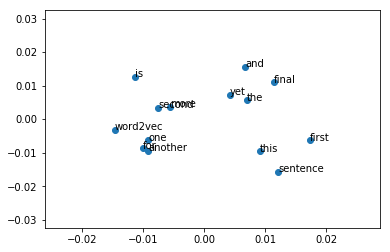

In [16]:
# plot word vectors using PCA
from matplotlib import pyplot
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = model[model.wv.vocab]
result = pca.fit_transform(X)
# create a scatter plot
pyplot.scatter(result[:,0],result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i,1]))
pyplot.show()

# Sentiment analysis

In [5]:
from gensim.models import Word2Vec
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
import numpy as np

In [72]:
docs1 = ['Well done!; Good work; Great effort; nice work; Excellent; Weak; Poor effort!; not good; poor work; Could have done better.']

In [73]:
docs = [i.split(';') for i in docs1]
print(docs)

[['Well done!', ' Good work', ' Great effort', ' nice work', ' Excellent', ' Weak', ' Poor effort!', ' not good', ' poor work', ' Could have done better.']]


In [74]:
from functools import reduce
docs_flat = reduce(lambda x,y: x+y,docs)
print(docs_flat)

['Well done!', ' Good work', ' Great effort', ' nice work', ' Excellent', ' Weak', ' Poor effort!', ' not good', ' poor work', ' Could have done better.']


In [6]:
# Labelling/scoring the sentiment
labels = np.array([1,1,1,1,1,0,0,0,0,0])
print(labels)
# In reality, this kind of labelling comes either from supervised learning/WordClouds/LDA/LSA

[1 1 1 1 1 0 0 0 0 0]


# Vectorizing using keras one-hot

In [19]:
# integer encoding the documents using keras one_hot encoding 
# This is not the same hot_encoding rather indexing based on the location
vocab_size =50
encoded_docs = [one_hot(d,vocab_size) for d in docs_flat]
print(encoded_docs)

[[25, 48], [18, 22], [39, 3], [17, 22], [28], [37], [3, 3], [40, 34], [3, 22], [40, 19, 48, 4]]


In [ ]:
# the sequences have different lengths and the integers indicates the location of that specific word in the vocabulary space

In [20]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[25 48  0  0]
 [18 22  0  0]
 [39  3  0  0]
 [17 22  0  0]
 [28  0  0  0]
 [37  0  0  0]
 [ 3  3  0  0]
 [40 34  0  0]
 [ 3 22  0  0]
 [40 19 48  4]]


In [21]:
# modeling
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 32)             1600      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Here the output of the embedding layer is 4x8 matrix (4=input_length, 8-output of the embedded vector)

In [22]:
# train the model
model.fit(padded_docs, labels, epochs=50, verbose=0) # padded_docs - one-hot encoded/indexed
#evaluate the model
loss,accuracy = model.evaluate(padded_docs, labels,verbose=0)
print('Accuracy: {}'.format(accuracy*100))

Accuracy: 89.9999976158


# vectorization using Tokenizer

In [16]:
print(docs_flat)

['Well done!', ' Good work', ' Great effort', ' nice work', ' Excellent', ' Weak', ' Poor effort!', ' not goot', ' poor work', ' Could have done better.']


In [31]:
# prepare tokenizer - unlike in keras one-hot, here we are not predefining the vocab_size rather getting it from the 
# vocabulary itself
t = Tokenizer()
t.fit_on_texts(docs_flat)
# creates the word_to_index dictionary 
vocab_size2 = len(t.word_index) + 1
print(t.word_index)
print(vocab_size2)
# integer encode the documents
# creates the integer vectors based on the words in the sentences
encoded_docs2 = t.texts_to_sequences(docs_flat)
print(encoded_docs2)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs2, maxlen=max_length, padding = 'post')
print(padded_docs)

{'poor': 4, 'great': 7, 'good': 6, 'weak': 10, 'could': 13, 'work': 1, 'well': 5, 'better': 15, 'goot': 12, 'done': 2, 'have': 14, 'excellent': 9, 'not': 11, 'effort': 3, 'nice': 8}
16
[[5, 2], [6, 1], [7, 3], [8, 1], [9], [10], [4, 3], [11, 12], [4, 1], [13, 14, 2, 15]]
[[ 5  2  0  0]
 [ 6  1  0  0]
 [ 7  3  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 4  3  0  0]
 [11 12  0  0]
 [ 4  1  0  0]
 [13 14  2 15]]


# using pre-trained Glove embedding

In [23]:
# load the whole embedding into memory

embeddings_index = dict()
with open('/home/ramscrux7757/SPARK/glove/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
print('Loaded {} word vectors'.format(len(embeddings_index)))

Loaded 400000 word vectors


In [27]:
embeddings_index['great']

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [42]:
# create a weeight matrix for words in training docs
# the embedding matrix is a (doc_size x embedded space) dimension matrix
# every doc is a vector of 100 elements (in this case)
embedding_matrix = np.zeros((vocab_size2, 100))
print(embedding_matrix)
for word, i in t.word_index.items():
    print(word,i)
    embedding_vector = embeddings_index.get(word)
    if  embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)
print(embedding_matrix)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('poor', 4)
('great', 7)
('good', 6)
('weak', 10)
('could', 13)
('work', 1)
('well', 5)
('better', 15)
('goot', 12)
('done', 2)
('have', 14)
('excellent', 9)
('not', 11)
('effort', 3)
('nice', 8)
(16, 100)
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [-0.11619     0.45447001 -0.69216001 ..., -0.54737002  0.48822001  0.32246   ]
 [-0.2978      0.31147    -0.14937    ..., -0.22709    -0.029261    0.4585    ]
 ..., 
 [ 0.05869     0.40272999  0.38633999 ..., -0.35973999  0.43718001  0.10121   ]
 [ 0.15711001  0.65605998  0.0021149  ..., -0.60614997  0.71004999
   0.41468999]
 [-0.047543    0.51914001  0.34283999 ..., -0.26859     0.48664999  0.55609   ]]


In [41]:
# define the model
model = Sequential()
e = Embedding(vocab_size2, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
# summarize the model
model.summary()
# fit  the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss,accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy {}:'.format(accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4, 100)            1600      
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 2,001
Trainable params: 401
Non-trainable params: 1,600
_________________________________________________________________
Accuracy 100.0:


# generating word-embeddings using Gensim

In [82]:
# following the vectorization from Tokenizer
print(t.word_index)

{'poor': 4, 'great': 7, 'good': 6, 'weak': 10, 'could': 13, 'work': 1, 'well': 5, 'better': 15, 'goot': 12, 'done': 2, 'have': 14, 'excellent': 9, 'not': 11, 'effort': 3, 'nice': 8}


In [86]:
docs_lst2 = t.word_index.keys()
print(docs_lst2)
print(len(docs_lst2))

['poor', 'great', 'good', 'weak', 'could', 'work', 'well', 'better', 'goot', 'done', 'have', 'excellent', 'not', 'effort', 'nice']
15


In [87]:
# Generating embedding model using gensim

# train model 
ebd_model = Word2Vec([docs_lst2], min_count = 1)
# summrize the moaded model
print(ebd_model)

Word2Vec(vocab=15, size=100, alpha=0.025)


In [88]:
print(ebd_model['done'])

[ -4.81037796e-03   2.09023221e-03   2.35071778e-03   3.80843412e-04
   3.75166885e-03   4.53934772e-03   4.93540382e-03  -9.96194780e-04
   1.39838620e-03  -2.16753615e-04  -5.28400531e-04   2.95642950e-03
  -2.63809762e-03   2.56817159e-03  -3.79028730e-03  -4.49219486e-03
   2.77458853e-03   3.47033492e-03  -1.86004990e-03  -8.05604504e-04
   1.81936088e-03  -3.94339254e-03  -1.48025167e-03  -4.25600359e-04
  -4.63156641e-04  -2.23293738e-03   4.10455698e-03   2.98301084e-03
   4.90180869e-03   3.21363244e-04  -3.66398925e-03  -2.08852789e-03
   3.35919298e-03  -4.69565894e-05  -3.90784303e-03  -1.36258849e-03
  -2.37535173e-03   3.61863407e-03   1.23370707e-03   2.48365849e-03
   1.72860827e-03  -4.00261348e-03   2.78630963e-04   2.31878436e-03
  -4.96223290e-03  -2.78676418e-03  -1.46768332e-04   3.92311765e-03
   1.10038812e-03  -3.97884799e-03   7.20909622e-04  -2.49280711e-04
   1.52486830e-03   6.63264014e-04  -4.83806152e-03   4.91132913e-03
   2.53371196e-03  -2.23401678e-03

In [90]:
t.word_index.items()

[('poor', 4),
 ('great', 7),
 ('good', 6),
 ('weak', 10),
 ('could', 13),
 ('work', 1),
 ('well', 5),
 ('better', 15),
 ('goot', 12),
 ('done', 2),
 ('have', 14),
 ('excellent', 9),
 ('not', 11),
 ('effort', 3),
 ('nice', 8)]

In [91]:
# create a weeight matrix for words in training docs
vocab_size3 = len(set(docs_lst2)) + 1
embedding_matrix2 = np.zeros((vocab_size3, 100))

for word, i in t.word_index.items():
    embedding_vector = ebd_model[word]
    #embedding_vector = embeddings_index.get(word)
    if  embedding_vector is not None:
        embedding_matrix2[i] = embedding_vector
        
print(embedding_matrix2.shape)
print(embedding_matrix2)

(16, 100)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.16592705e-05   7.61602831e-04   3.24354065e-03 ...,  -2.95457011e-03
    1.06048153e-03   2.95024808e-03]
 [ -4.81037796e-03   2.09023221e-03   2.35071778e-03 ...,   3.84394708e-03
    1.44666876e-03   2.23670457e-03]
 ..., 
 [  2.36723083e-03   4.02091508e-04   9.88070969e-04 ...,  -1.36979274e-03
   -1.13945687e-03   1.90868753e-03]
 [ -5.15873719e-04  -3.15627130e-03   2.49778945e-03 ...,  -3.30333016e-03
   -1.95337366e-03  -3.08220508e-03]
 [  3.36224190e-03  -2.24425760e-03   2.30989812e-04 ...,  -1.01240037e-03
    6.21207757e-04  -2.73332582e-03]]


In [92]:
# define the model
model = Sequential()
e2 = Embedding(vocab_size3, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e2)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
# summarize the model
model.summary()
# fit  the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss,accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy {}:'.format(accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4, 100)            1600      
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 401       
Total params: 2,001
Trainable params: 401
Non-trainable params: 1,600
_________________________________________________________________
Accuracy 100.0:
